# Import the Libraries

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ipywidgets import interact

# Read the Dataset and Remove duplicates

In [355]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.drop_duplicates()
print(df.isnull().sum())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# Replace the null value of the bmi with mean 

In [356]:
df.head(10)
df.shape
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [357]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Check the datatypes and describe of the Dataset

In [358]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [359]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [360]:
df2=df.copy()

# Use interact to filter the Data

In [361]:
@interact
def filter_work_type(work_type=list(df2.work_type.unique())):
    return df2[df2.work_type==work_type]

interactive(children=(Dropdown(description='work_type', options=('Private', 'Self-employed', 'Govt_job', 'chil…

In [362]:
@interact
def filter_smoking_status(smoking_status=list(df2.smoking_status.unique())):
    return df2[df2.smoking_status==smoking_status]

interactive(children=(Dropdown(description='smoking_status', options=('formerly smoked', 'never smoked', 'smok…

In [363]:
@interact
def filter_bmi(bmi=(0,100,0.1)):
    return df2[df2.bmi>bmi]

interactive(children=(FloatSlider(value=50.0, description='bmi'), Output()), _dom_classes=('widget-interact',)…

In [364]:
@interact
def filter_avg_glucose_level(avg_glucose_level=(0,300,0.1)):
    return df2[df2.avg_glucose_level>avg_glucose_level]

interactive(children=(FloatSlider(value=150.0, description='avg_glucose_level', max=300.0), Output()), _dom_cl…

## Lable encoding

In [365]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['ever_married']=l.fit_transform(df['ever_married'])
df['Residence_type']=l.fit_transform(df['Residence_type'])
df['work_type']=l.fit_transform(df['work_type'])
df['smoking_status']=l.fit_transform(df['smoking_status'])
df['gender']=l.fit_transform(df['gender'])
df.dtypes


id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

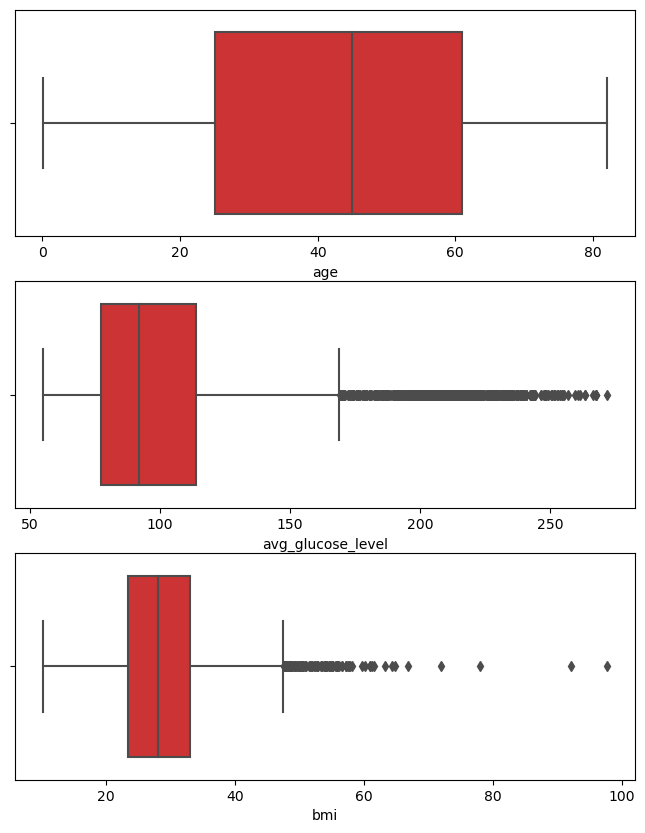

In [366]:
plt.figure(figsize=(8,10))
for i,col in enumerate(df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set1"))

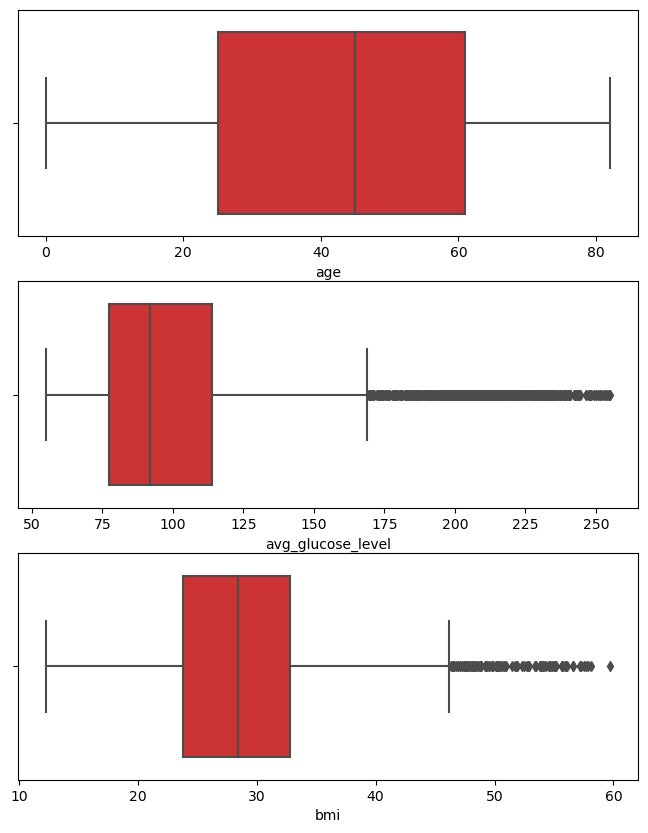

In [367]:
df = df[(df["bmi"]<60)&(df["bmi"]>12)]
df = df[(df["avg_glucose_level"]<255)]
plt.figure(figsize=(8,10))
for i,col in enumerate(df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=df,x=col,palette =sns.color_palette("Set1"))

# Count plot of data 

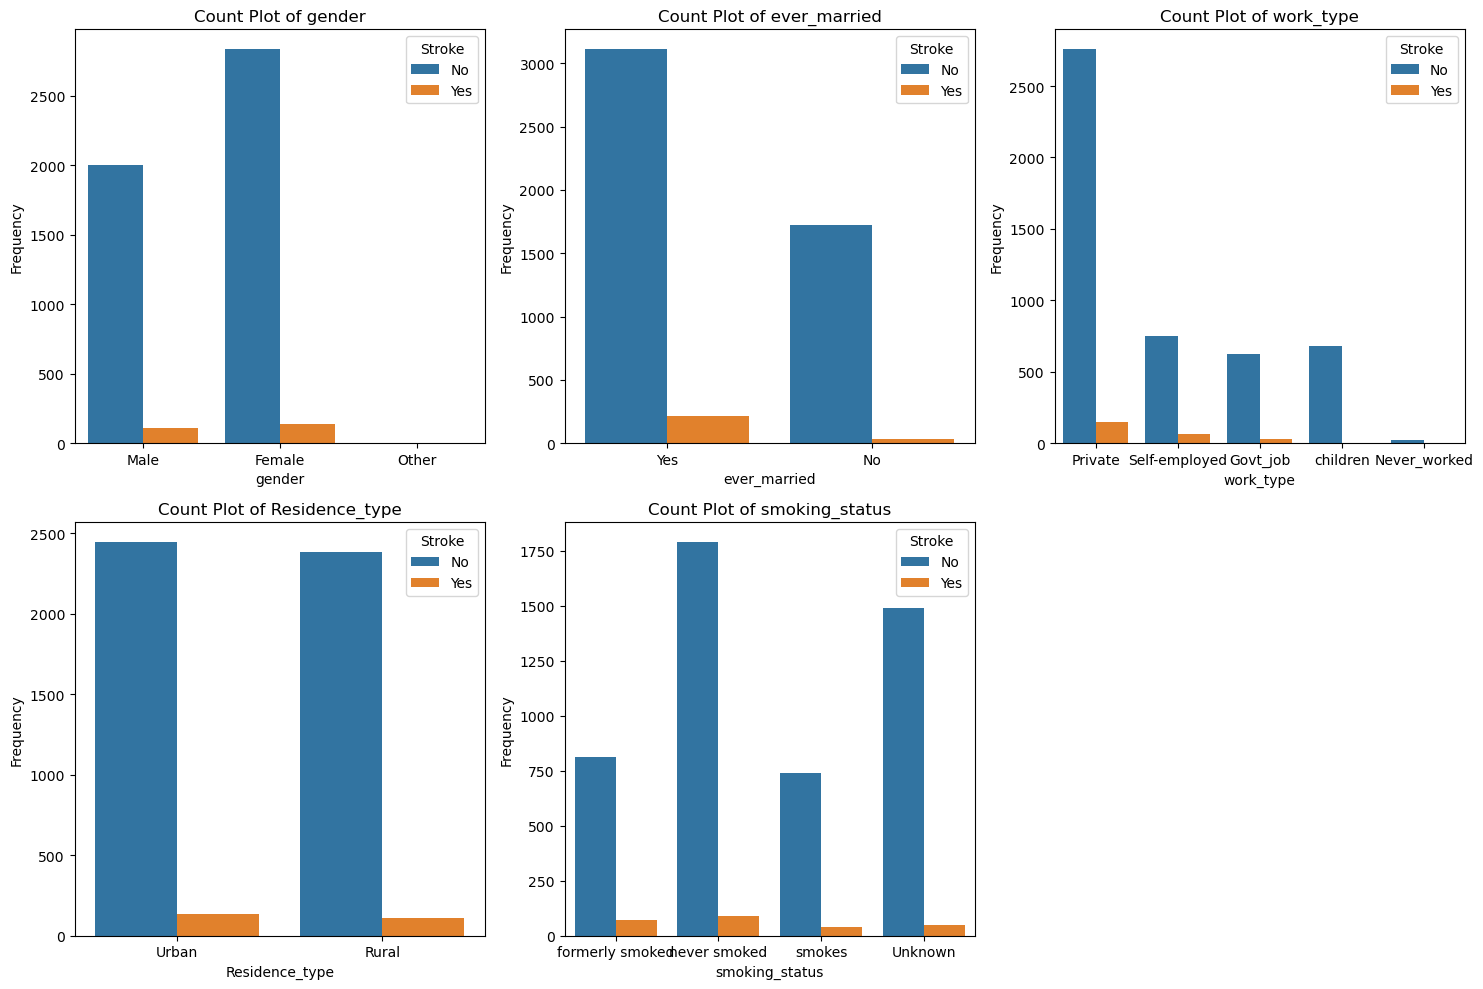

{'gender': Female    2994
 Male      2115
 Other        1
 Name: gender, dtype: int64,
 'ever_married': Yes    3353
 No     1757
 Name: ever_married, dtype: int64,
 'work_type': Private          2925
 Self-employed     819
 children          687
 Govt_job          657
 Never_worked       22
 Name: work_type, dtype: int64,
 'Residence_type': Urban    2596
 Rural    2514
 Name: Residence_type, dtype: int64,
 'smoking_status': never smoked       1892
 Unknown            1544
 formerly smoked     885
 smokes              789
 Name: smoking_status, dtype: int64}

In [368]:
df2 = df2[(df2["bmi"]<60)&(df["bmi"]>12)]
df2 = df2[(df2["avg_glucose_level"]<255)]

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df2, x=col, hue='stroke')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

value_counts = {col: data[col].value_counts() for col in categorical_cols}
value_counts

# Drop id from dataset and plot some pie chart

In [369]:
df1=df.iloc[:,1:]

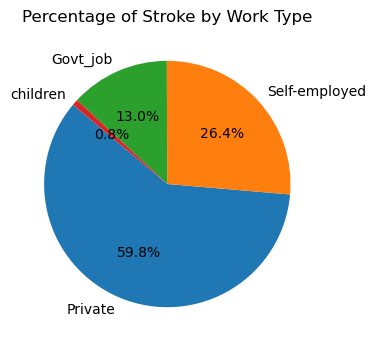

In [370]:

stroke_data = df2[df2['stroke'] == 1]

work_type_counts = stroke_data['work_type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Stroke by Work Type')
plt.show()

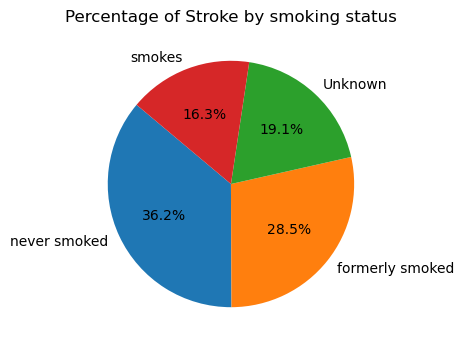

In [371]:
stroke_data = df2[df2['stroke'] == 1]

smoke_type_counts = stroke_data['smoking_status'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(smoke_type_counts, labels=smoke_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Stroke by smoking status')
plt.show()

# Corralation of the features

<Axes: >

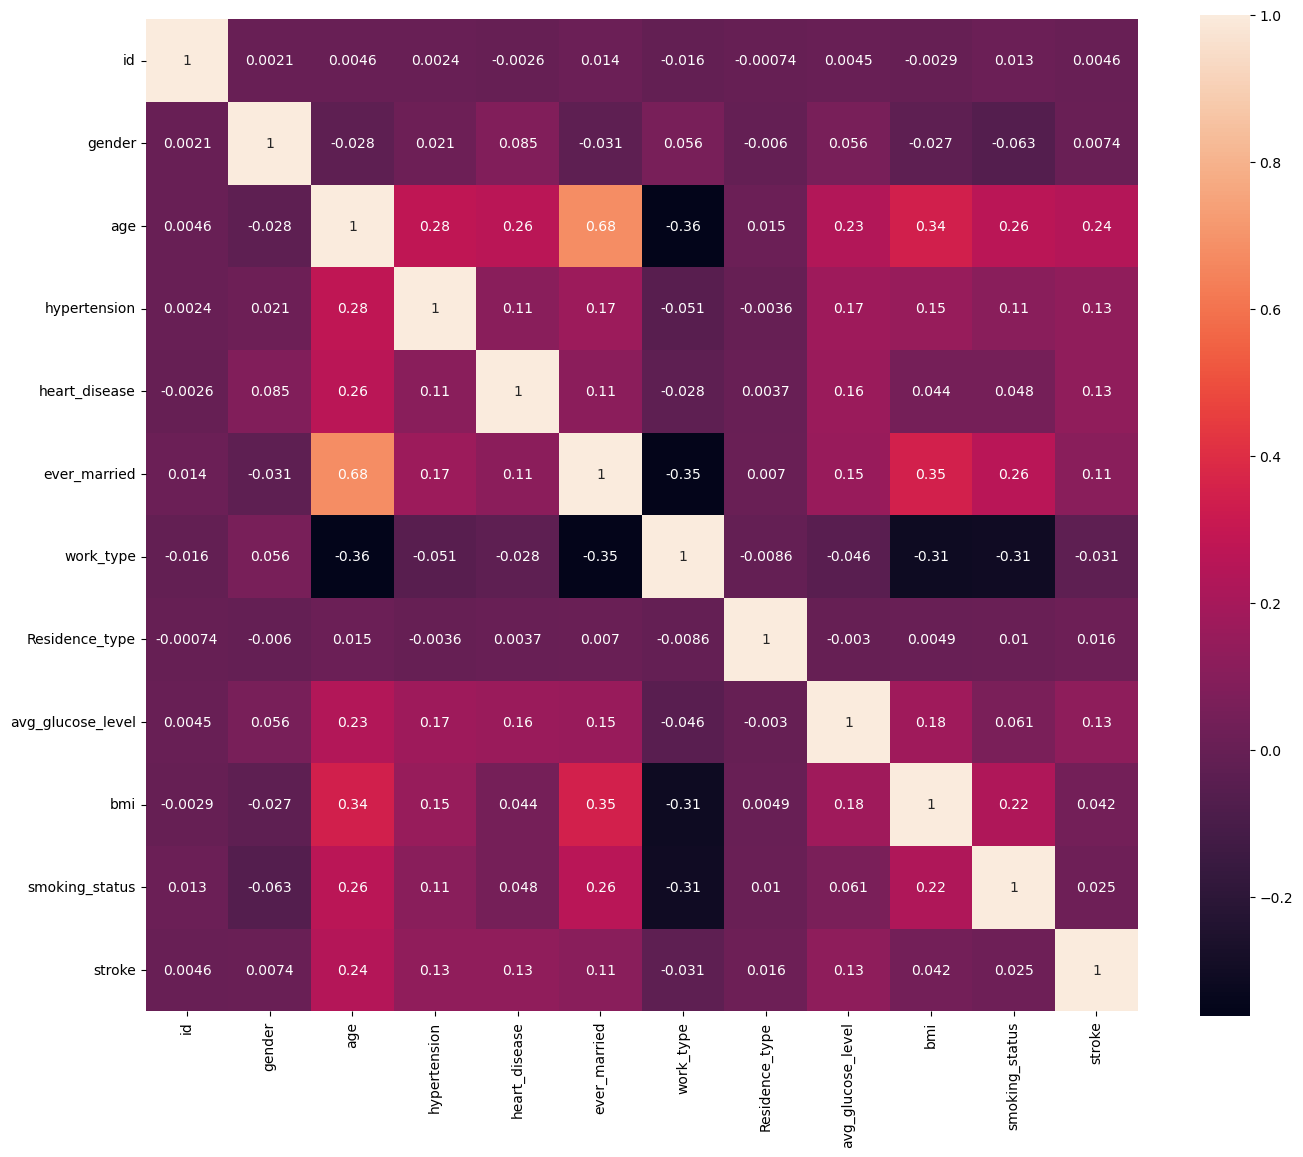

In [372]:
plt.figure(figsize=(16,13))
corr=df.corr()
sns.heatmap(corr,annot=True,square=True)

# select X and Y

In [373]:
df=df.iloc[:,1:]
x=df.iloc[:,:-1].values
y=df['stroke'].values
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Standard the data

In [374]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)


# train test spliting


In [375]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# distribution of y_train befor applying SMOTE

<Axes: title={'center': 'Class distribution'}, xlabel='stroke'>

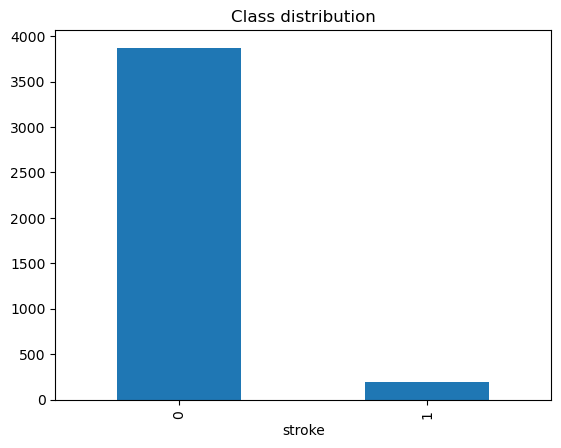

In [376]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution', xlabel='stroke')

# Use SMOTE to distrobute the data for better analyze

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='stroke'>

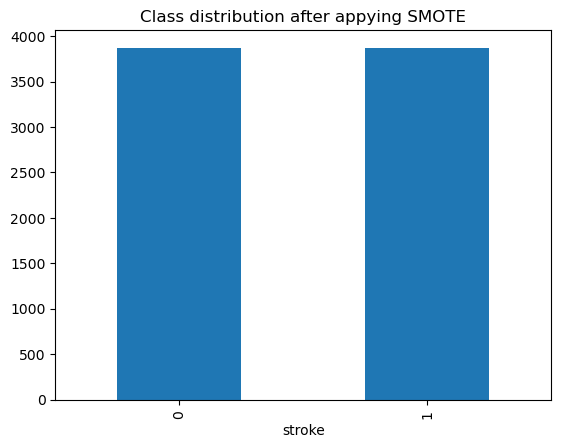

In [377]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='stroke')




# distribution of y_test befor applying SMOTE

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='stroke'>

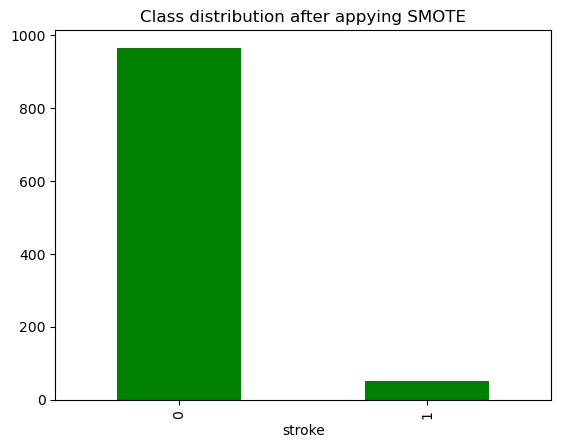

In [378]:
pd.Series(y_test).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='stroke',color='g')


# Use SMOTE to distrobute the data for better analyze

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='stroke'>

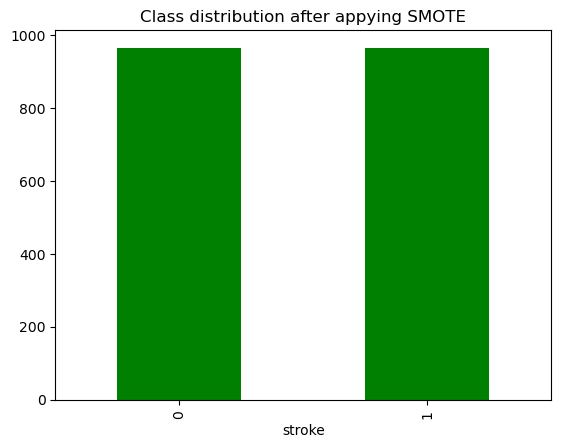

In [379]:
x_test_resampled, y_test_resampled = smote.fit_resample(x_test, y_test)
pd.Series(y_test_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='stroke',color="g")


In [380]:
x_train=x_train_resampled
x_test=x_test_resampled
y_train=y_train_resampled
y_test=y_test_resampled

# KNN model

Text(0, 0.5, 'Error Rate')

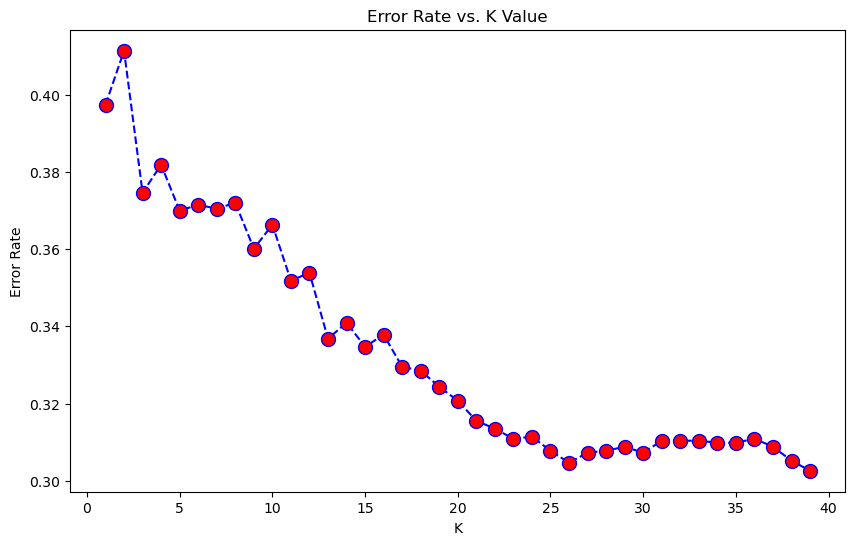

In [381]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [382]:
knn=KNeighborsClassifier(n_neighbors=25)
knn_model=knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_test)
knn_model



KNeighborsClassifier(n_neighbors=25)

In [383]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
knn_accuracy=accuracy_score(y_test,knn_prediction)
knn_precision=precision_score(y_test,knn_prediction)
knn_recall=recall_score(y_test,knn_prediction)
knn_f1Score = f1_score(y_test, knn_prediction, average='weighted')
print('KNN_Accuracy:', knn_accuracy)
print('KNN_F1 score:', knn_f1Score)




KNN_Accuracy: 0.6922279792746114
KNN_F1 score: 0.6920374921157172


In [384]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_prediction))


              precision    recall  f1-score   support

           0       0.70      0.67      0.68       965
           1       0.68      0.72      0.70       965

    accuracy                           0.69      1930
   macro avg       0.69      0.69      0.69      1930
weighted avg       0.69      0.69      0.69      1930



In [385]:
cm = confusion_matrix(y_test, knn_prediction)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[644 321]
 [273 692]]


In [386]:
from sklearn import metrics

# Confusion matrix of KNN model

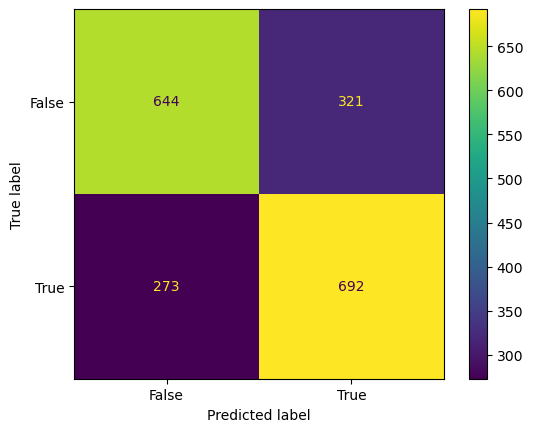

In [387]:
cm_knn=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_knn.plot()

# Logistic Regression 

In [392]:
from sklearn.linear_model import LogisticRegression
LO=LogisticRegression()
logistic=LO.fit(x_train,y_train)
logistic_predict=LO.predict(x_test)
logistic

LogisticRegression()

In [393]:
logistic_accuracy=accuracy_score(y_test,logistic_predict)
logistic_f1Score = f1_score(y_test, logistic_predict, average='weighted')
logistic_recall=recall_score(y_test,logistic_predict)
logistic_precision=precision_score(y_test,logistic_predict)
print('logistic_Accuracy:', logistic_accuracy)
print('logistic_F1 score:', logistic_f1Score)
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_predict))

logistic_Accuracy: 0.7673575129533678
logistic_F1 score: 0.7667437664514458
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       965
           1       0.74      0.82      0.78       965

    accuracy                           0.77      1930
   macro avg       0.77      0.77      0.77      1930
weighted avg       0.77      0.77      0.77      1930



In [396]:
cm_log = confusion_matrix(y_test, logistic_predict)
print('Confusion matrix:')
print(cm_log)

Confusion matrix:
[[691 274]
 [175 790]]


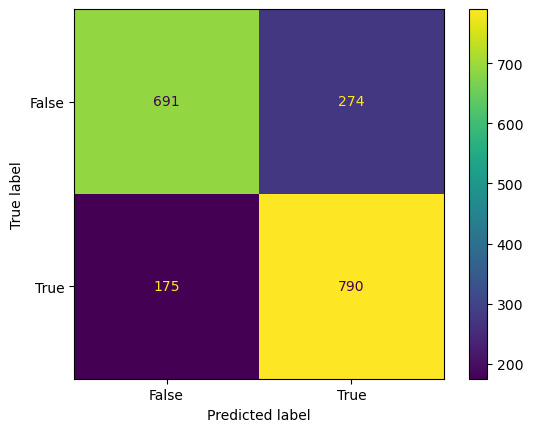

In [397]:
cm_knn=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=[False,True])
cm_knn.plot()

# DecisionTreeClassifier

In [398]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
  'min_samples_split': [2, 4, 6, 8, 10],
  'min_samples_leaf': [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(DT1, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score:  0.8626614987080103


In [400]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split= 2)
DT1=DecisionTreeClassifier()
dt=DT.fit(x_train,y_train)
dt_predict=DT.predict(x_test)
dt

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [401]:
DecisionTree_accuracy=accuracy_score(y_test,dt_predict)
DecisionTree_precision=precision_score(y_test,dt_predict)
DecisionTree_recall=recall_score(y_test,dt_predict)
DecisionTree_f1Score = f1_score(y_test,dt_predict, average='weighted')
print('DecisionTree_Accuracy:', knn_accuracy)
print('DecisionTree_F1 score:', knn_f1Score)

DecisionTree_Accuracy: 0.6922279792746114
DecisionTree_F1 score: 0.6920374921157172


In [402]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_predict))


              precision    recall  f1-score   support

           0       0.73      0.85      0.78       965
           1       0.82      0.68      0.74       965

    accuracy                           0.77      1930
   macro avg       0.77      0.77      0.76      1930
weighted avg       0.77      0.77      0.76      1930



Confusion matrix:
[[820 145]
 [308 657]]


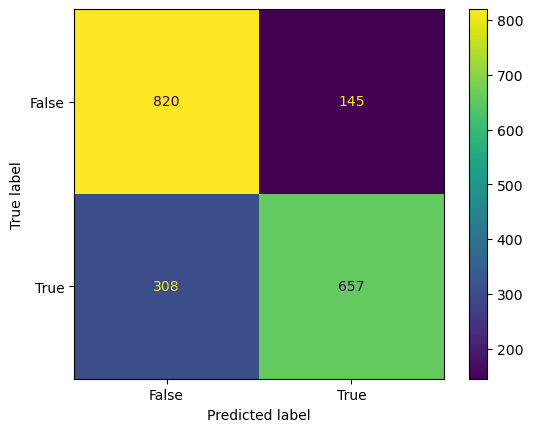

In [403]:
cm_DecisionTree = confusion_matrix(y_test, dt_predict)
print('Confusion matrix:')
print(cm_DecisionTree)
cm_dt=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_DecisionTree,display_labels=[False,True])
cm_dt.plot()

# RandomForestClassifier


In [404]:
param_grid = {
   'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {grid_search.best_score_}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9620155038759691


In [406]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf_model=rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
rf_model

RandomForestClassifier(n_estimators=200)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       965
           1       0.94      0.60      0.74       965

    accuracy                           0.78      1930
   macro avg       0.82      0.78      0.78      1930
weighted avg       0.82      0.78      0.78      1930



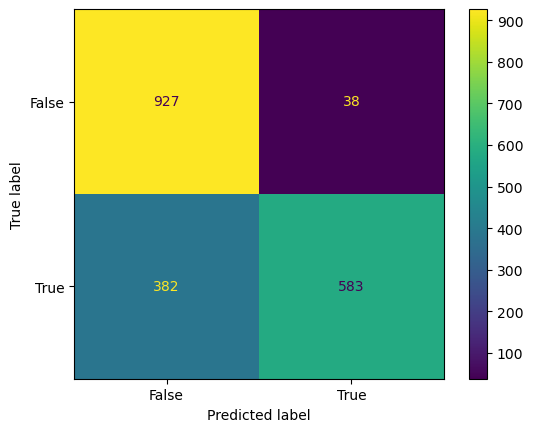

In [407]:
print(classification_report(y_test, rf_predict))
rf_accuracy=accuracy_score(y_test,rf_predict)
rf_precision=precision_score(y_test,rf_predict)
rf_recall=recall_score(y_test,rf_predict)
rf_f1score=f1_score(y_test,rf_predict)
cm_rf =confusion_matrix(y_test, rf_predict)
cm_rf=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=[False,True])
cm_rf.plot()

# XGBOOST (GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       965
           1       0.98      0.90      0.94       965

    accuracy                           0.94      1930
   macro avg       0.95      0.94      0.94      1930
weighted avg       0.95      0.94      0.94      1930



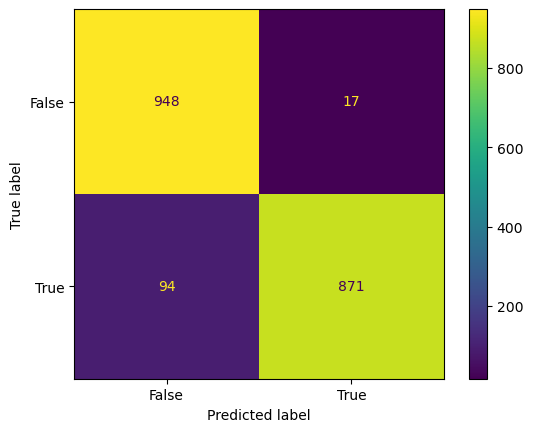

In [408]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier(learning_rate=0.3,n_estimators=300)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
xgb_accuracy=accuracy_score(y_test,xgb_pred)
xgb_precision=precision_score(y_test,xgb_pred)
xgb_recall=recall_score(y_test,xgb_pred)
xgb_f1score=f1_score(y_test,xgb_pred)
print(classification_report(y_test, xgb_pred))
cm_xgb =confusion_matrix(y_test, xgb_pred)
cm_xgb=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=[False,True])
cm_xgb.plot()


# Accuracy, Precision, and Recall Comparison

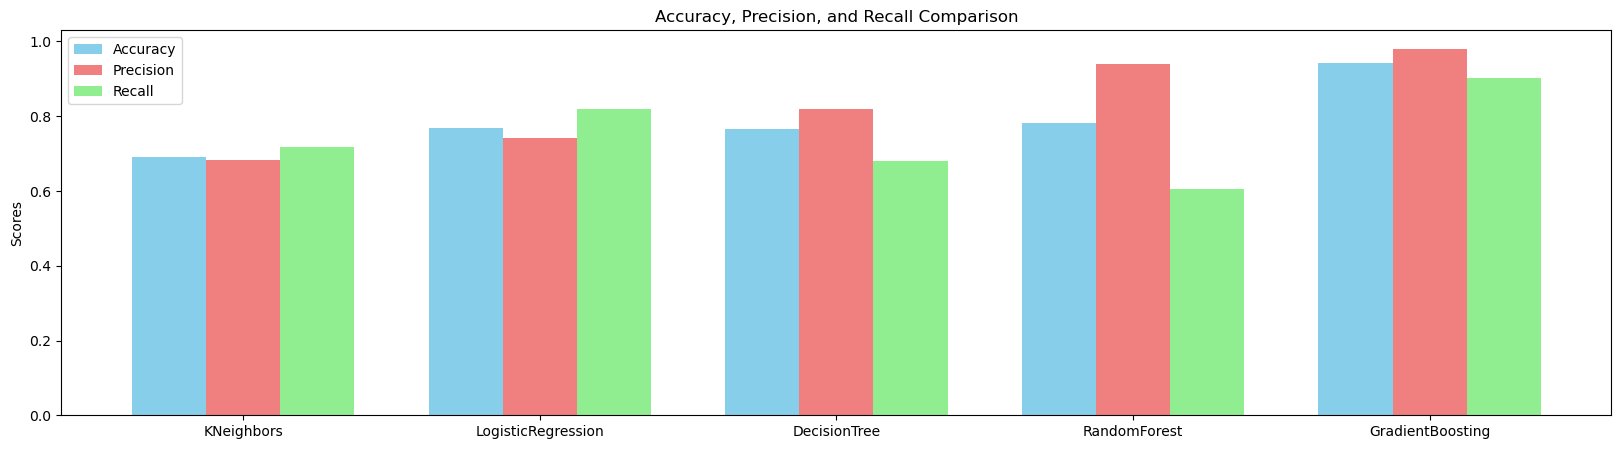

In [409]:
algorithms = ['KNeighbors', 'LogisticRegression', 'DecisionTree','RandomForest',
              'GradientBoosting']
accuracy = [knn_accuracy, logistic_accuracy,DecisionTree_accuracy,rf_accuracy,xgb_accuracy]
precision = [knn_precision, logistic_precision,DecisionTree_precision,rf_precision,xgb_precision]
recall = [knn_recall, logistic_recall,DecisionTree_recall,rf_recall,xgb_recall]

bar_width = 0.25
x = np.arange(len(algorithms))
fig, ax = plt.subplots(figsize=(20, 5))
accuracy_bars = ax.bar(x - bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
precision_bars = ax.bar(x, precision, bar_width, label='Precision', color='lightcoral')
recall_bars = ax.bar(x + bar_width, recall, bar_width, label='Recall', color='lightgreen')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Scores')
ax.set_title('Accuracy, Precision, and Recall Comparison')
ax.legend()
plt.show()

# F1 Score Comparison


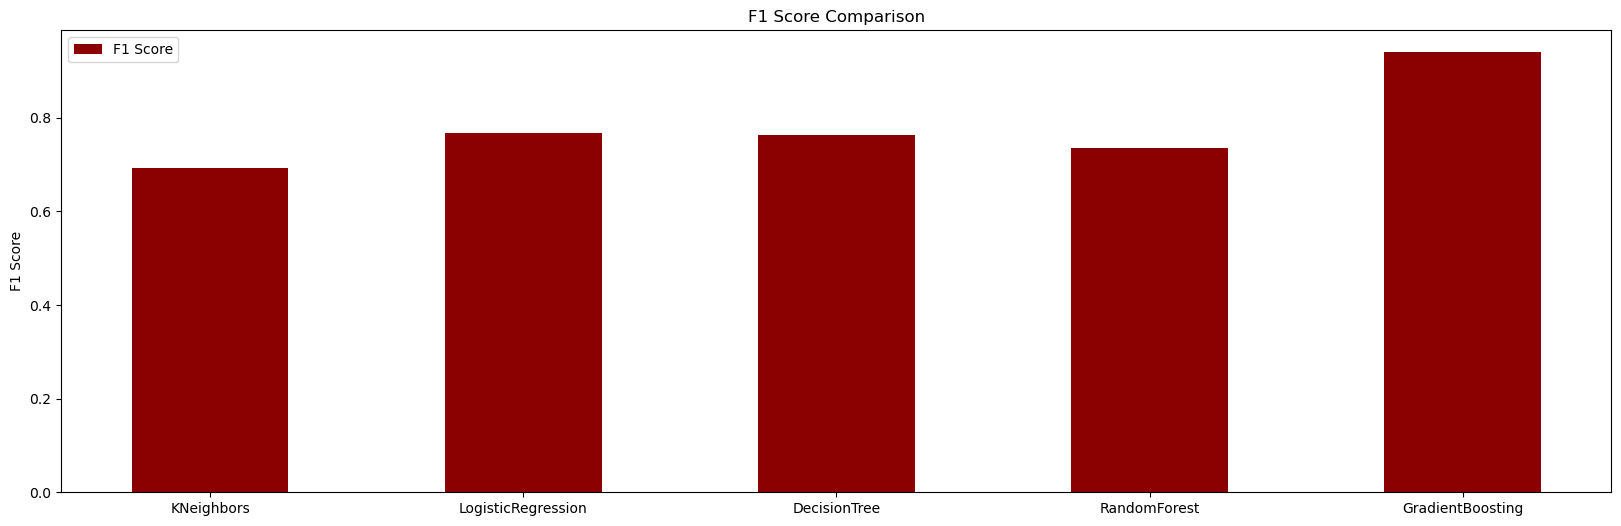

In [411]:
algorithms = ['KNeighbors', 'LogisticRegression', 'DecisionTree','RandomForest',
              'GradientBoosting']

f1_scores =[knn_f1Score, logistic_f1Score,DecisionTree_f1Score,rf_f1score,xgb_f1score]

bar_width = 0.5
x = np.arange(len(algorithms))
fig, ax = plt.subplots(figsize=(20, 6))
f1_score_bars = ax.bar(x, f1_scores, bar_width, label='F1 Score', color='darkred')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.legend()
plt.show()
